<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Sam_Kumar_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 58kB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import numpy as num


In [2]:
## doublecheck version of panda
pd.__version__

'0.23.4'

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [11]:
###

# Set file path

surgery_data_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

surgery_data_file = "haberman.data"

# Download the file to local folder

!wget $surgery_data_file_url


--2019-09-16 01:14:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data.1’

haberman.data.1     100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-16 01:14:24 (131 MB/s) - ‘haberman.data.1’ saved [3103/3103]



In [15]:
#examine data file

!head $surgery_data_file



30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1


In [16]:
!tail $surgery_data_file

72,67,3,1
73,62,0,1
73,68,0,1
74,65,3,2
74,63,0,1
75,62,1,1
76,67,0,1
77,65,3,1
78,65,1,2
83,58,2,2


In [19]:
#set column header

column_header = ['Patient Age', 'Surgery Year', 'Nodes Detected', 'Survival Stats']

# Now read file into pandas

df = pd.read_csv (surgery_data_file, names=column_header)

df.head()

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
## Lets examine the data before diving deep into other features

df.describe()

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [23]:
# check for nulls

df.isna().sum()

Patient Age       0
Surgery Year      0
Nodes Detected    0
Survival Stats    0
dtype: int64

In [28]:
# Examine survival feature

df['Survival Stats'].count()


array([1, 2])

In [31]:
df['Survival Stats'].nunique()

2

In [0]:
# change the definition of survival feature

# write fancy function to send 0 if value is 2, and for rest pass same value

def change_feature_value(x):
  if (x ==2):
    return (0)
  else:
    return(x)
  
  

In [40]:
# test the function

a = 2

print (change_feature_value(a))

0


In [44]:
# change feature values

df['Survival Stats'] = df['Survival Stats'].apply(change_feature_value)




df['Survival Stats']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: Survival Stats, Length: 306, dtype: int64

In [52]:
## check unique values of survival stats

df.describe()

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [53]:
df['Survival Stats'].unique()

array([1, 0])

In [55]:
# now print first 5 rows

df.head()

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [56]:
# just in case, print last 5 rows
df.tail()

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0
305,83,58,2,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [59]:
# Analyze and discover any relationships

node_survival_subset = pd.crosstab (df['Nodes Detected'], df['Survival Stats'])

node_survival_subset

Survival Stats,0,1
Nodes Detected,,
0,19,117
1,8,33
2,5,15
3,7,13
4,3,10
5,4,2
6,3,4
7,2,5
8,2,5


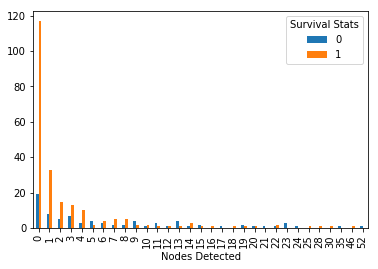

In [60]:
node_survival_subset.plot(kind='bar')

In [0]:
## do one more table and plot




In [65]:
## lets do one more plot and crosstab

age_node_subset = pd.crosstab (df['Patient Age'], df['Nodes Detected'])

age_node_subset

Nodes Detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Patient Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,2,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,2,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# Lets try to layer in age and see what we discover


## maybe it will be bertter to do bins for age as well
age_bin = pd.cut(df['Patient Age'], bins=5)  # 5 equal-sized bins

## 5 seems to be good as it gives roughly 10 years, lets go with this baseline

age_bin

0      (29.947, 40.6]
1      (29.947, 40.6]
2      (29.947, 40.6]
3      (29.947, 40.6]
4      (29.947, 40.6]
5      (29.947, 40.6]
6      (29.947, 40.6]
7      (29.947, 40.6]
8      (29.947, 40.6]
9      (29.947, 40.6]
10     (29.947, 40.6]
11     (29.947, 40.6]
12     (29.947, 40.6]
13     (29.947, 40.6]
14     (29.947, 40.6]
15     (29.947, 40.6]
16     (29.947, 40.6]
17     (29.947, 40.6]
18     (29.947, 40.6]
19     (29.947, 40.6]
20     (29.947, 40.6]
21     (29.947, 40.6]
22     (29.947, 40.6]
23     (29.947, 40.6]
24     (29.947, 40.6]
25     (29.947, 40.6]
26     (29.947, 40.6]
27     (29.947, 40.6]
28     (29.947, 40.6]
29     (29.947, 40.6]
            ...      
276      (61.8, 72.4]
277      (61.8, 72.4]
278      (61.8, 72.4]
279      (61.8, 72.4]
280      (61.8, 72.4]
281      (61.8, 72.4]
282      (61.8, 72.4]
283      (61.8, 72.4]
284      (61.8, 72.4]
285      (61.8, 72.4]
286      (61.8, 72.4]
287      (61.8, 72.4]
288      (61.8, 72.4]
289      (61.8, 72.4]
290      (

In [66]:
age_node_subset = pd.crosstab (age_bin, df['Nodes Detected'])

age_node_subset

Nodes Detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Patient Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(29.947, 40.6]",19,5,4,2,2,1,1,1,0,1,2,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
"(40.6, 51.2]",40,15,7,6,5,1,4,2,3,1,1,2,1,2,2,0,1,0,0,1,2,0,0,2,0,0,0,0,0,0,1
"(51.2, 61.8]",36,15,5,9,5,4,1,4,1,3,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,0
"(61.8, 72.4]",37,4,3,1,1,0,1,0,3,1,0,0,0,2,1,1,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0
"(72.4, 83.0]",4,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


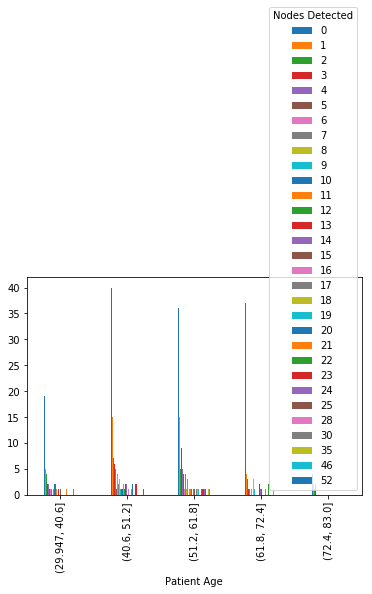

In [69]:
age_node_subset.plot(kind='bar')

In [101]:
# we need to bucket nodes

nodes_bin = pd.cut(df['Nodes Detected'], bins=18)  # 4 equal-sized bins


## 18 seems to be good , lets go with this baseline

nodes_bin

0       (-0.052, 2.889]
1        (2.889, 5.778]
2       (-0.052, 2.889]
3       (-0.052, 2.889]
4        (2.889, 5.778]
5       (8.667, 11.556]
6       (-0.052, 2.889]
7       (-0.052, 2.889]
8       (8.667, 11.556]
9      (28.889, 31.778]
10      (-0.052, 2.889]
11      (8.667, 11.556]
12       (5.778, 8.667]
13      (-0.052, 2.889]
14     (11.556, 14.444]
15      (-0.052, 2.889]
16      (-0.052, 2.889]
17      (-0.052, 2.889]
18      (-0.052, 2.889]
19      (-0.052, 2.889]
20      (-0.052, 2.889]
21       (5.778, 8.667]
22     (14.444, 17.333]
23      (-0.052, 2.889]
24     (20.222, 23.111]
25      (-0.052, 2.889]
26      (-0.052, 2.889]
27      (-0.052, 2.889]
28       (2.889, 5.778]
29      (-0.052, 2.889]
             ...       
276     (-0.052, 2.889]
277     (-0.052, 2.889]
278     (-0.052, 2.889]
279     (-0.052, 2.889]
280     (-0.052, 2.889]
281      (5.778, 8.667]
282     (-0.052, 2.889]
283     (-0.052, 2.889]
284     (-0.052, 2.889]
285     (-0.052, 2.889]
286      (2.889,

In [102]:
age_node_subset = pd.crosstab (age_bin, nodes_bin)

age_node_subset

Nodes Detected,"(-0.052, 2.889]","(2.889, 5.778]","(5.778, 8.667]","(8.667, 11.556]","(11.556, 14.444]","(14.444, 17.333]","(17.333, 20.222]","(20.222, 23.111]","(23.111, 26.0]","(26.0, 28.889]","(28.889, 31.778]","(34.667, 37.556]","(43.333, 46.222]","(49.111, 52.0]"
Patient Age,,,,,,,,,,,,,,
"(29.947, 40.6]",28,5,2,4,1,1,0,1,0,0,1,0,0,0
"(40.6, 51.2]",62,12,9,4,5,1,3,2,0,0,0,0,0,1
"(51.2, 61.8]",56,18,6,4,2,2,2,2,2,0,0,1,1,0
"(61.8, 72.4]",44,2,4,1,3,1,1,2,0,1,0,0,0,0
"(72.4, 83.0]",7,2,0,0,0,0,0,0,0,0,0,0,0,0


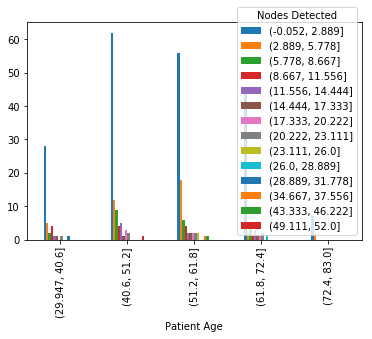

In [103]:
age_node_subset.plot(kind='bar')

In [104]:
# Its getting interesting, now layer survival stat

age_node_subset = pd.crosstab (age_bin, [nodes_bin, df['Survival Stats']], )

age_node_subset

Nodes Detected (-0.052, 2.889]      ...       (49.111, 52.0]
Survival Stats               0      ...                    0
Patient Age                         ...                     
(29.947, 40.6]               2      ...                    0
(40.6, 51.2]                14      ...                    1
(51.2, 61.8]                 6      ...                    0
(61.8, 72.4]                 8      ...                    0
(72.4, 83.0]                 2      ...                    0

[5 rows x 23 columns]

In [100]:
age_node_subset = pd.crosstab (age_bin, [nodes_bin, df['Survival Stats']],normalize='columns' )

age_node_subset

Nodes Detected (-0.052, 4.333]      ...       (47.667, 52.0]
Survival Stats               0      ...                    0
Patient Age                         ...                     
(29.947, 40.6]        0.047619      ...                  0.0
(40.6, 51.2]          0.380952      ...                  1.0
(51.2, 61.8]          0.285714      ...                  0.0
(61.8, 72.4]          0.214286      ...                  0.0
(72.4, 83.0]          0.071429      ...                  0.0

[5 rows x 16 columns]

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [76]:
## get subset of values where survival stats is 1 ( individuals who survived > 5 years)

df.loc[df['Survival Stats']== 1]

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [77]:
## get subset of values where survival stats is 0 ( individuals who DID NOT survive > 5 years)

df.loc[df['Survival Stats']== 0]

,Patient Age,Surgery Year,Nodes Detected,Survival Stats
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


In [75]:
# Double check coutns - Individuals who survived > 5 years and NOT

df['Survival Stats'].value_counts()

1    225
0     81
Name: Survival Stats, dtype: int64

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

**1). The younger the age, the higher the chances of survival,especially if Nodes detected are > 0**

**2). The older the age, the lower the chance of survival, especially if nodes detected are > 0**

**3). Age is inversely related to Survival, and if we layer in nodes detected, it becomes acute if # of nodes detected increases.**


In [109]:
# Any Supplemental Code for Analysis Here

## crosstab of patient by nodes detected and survival status


age_node_subset = pd.crosstab (age_bin, [nodes_bin, df['Survival Stats']] )

age_node_subset

Nodes Detected (-0.052, 2.889]      ...       (49.111, 52.0]
Survival Stats               0      ...                    0
Patient Age                         ...                     
(29.947, 40.6]               2      ...                    0
(40.6, 51.2]                14      ...                    1
(51.2, 61.8]                 6      ...                    0
(61.8, 72.4]                 8      ...                    0
(72.4, 83.0]                 2      ...                    0

[5 rows x 23 columns]

In [110]:
# do the same thing but with no bins for nodes

age_node_subset = pd.crosstab (df['Nodes Detected'], [age_bin, df['Survival Stats']] )

age_node_subset

Patient Age    (29.947, 40.6]     (40.6, 51.2] ... (61.8, 72.4] (72.4, 83.0]   
Survival Stats              0   1            0 ...            1            0  1
Nodes Detected                                 ...                             
0                           2  17           10 ...           32            0  4
1                           0   5            2 ...            2            1  1
2                           0   4            2 ...            2            1  0
3                           0   2            2 ...            1            1  1
4                           0   2            0 ...            0            0  0
5                           0   1            1 ...            0            0  0
6                           0   1            2 ...            1            0  0
7                           0   1            1 ...            0            0  0
8                           0   0            0 ...            1            0  0
9                           1   0            1 ...            1            0  0
10                          0   2            1 ...            0            0  0
11                          0   1            2 ...            0            0  0
12                          0   0            0 ...            0            0  0
13                          0   1            2 ...            0            0  0
14                          0   0            0 ...            1            0  0
15                          0   1            0 ...            0            0  0
16                          0   0            0 ...            0            0  0
17                          0   0            0 ...            0            0  0
18                          0   0            0 ...            0            0  0
19                          0   0            1 ...            0            0  0
20                          0   0            1 ...            0            0  0
21                          1   0            0 ...            0            0  0
22                          0   0            0 ...            1            0  0
23                          0   0            2 ...            0            0  0
24                          0   0            0 ...            0            0  0
25                          0   0            0 ...            0            0  0
28                          0   0            0 ...            1            0  0
30                          0   1            0 ...            0            0  0
35                          0   0            0 ...            0            0  0
46                          0   0            0 ...            0            0  0
52                          0   0            1 ...            0            0  0

[31 rows x 10 columns]